In [36]:
%load_ext autoreload
%autoreload

import sys
sys.path.append('../..')

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from seismicpro.src import FieldIndex, TraceIndex, CustomIndex


from Ground_Roll.src.utils import make_index, check_res

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
def visualize_geom(index):
    """
    cols = [
        'TRACE_SEQUENCE_LINE',
        'FieldRecord', # 'FieldRecord' = 'SourceY' x 'SourceX'
        'SourceY', 'SourceX', 'GroupY', 'GroupX',
        'CDP_X', # 'CROSSLINE_3D'
        'CDP_Y', # 'INLINE_3D' 
        'CDP', # 'CDP_X' x 'CDP_Y', 'CDP_TR 16 = 'CDP_X' x 'CDP_Y' inside 'FieldRecord'
        'offset',

        'ReceiverDatumElevation', # rline
        'SourceDatumElevation', # reciever id inside rline
        'SourceWaterDepth', # sline
        'GroupWaterDepth', # source id in sline
    ]

    """
    df = index.get_df()
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

    ax1.scatter(x=df['GroupX'], y=df['GroupY'], c='green', marker='^', label='Reciever')
    ax1.scatter(x=df['CDP_X'], y=df['CDP_Y'], c='blue', marker='.', label='CDP', alpha=0.1)
    ax1.scatter(x=df['SourceX'], y=df['SourceY'], c='red', marker='v', label='Source')
    ax1.legend();
    ax1.set_title("Geometry")
    
    def heatmap(index_col, x_col, y_col, fillna=None):
        tr_count= df[index_col].value_counts()
        d1 = df[[index_col, x_col, y_col]].droplevel(1, axis=1).drop_duplicates().set_index(index_col)
        d1['tr_count'] = tr_count

        p = d1.pivot(index=x_col, columns=y_col, values='tr_count')
        
        if fillna is not None:        
            rindex = np.arange(df[x_col].min(), df[x_col].max(), np.diff(np.unique(df[x_col].values)).min())
            cindex = np.arange(df[y_col].min(), df[y_col].max(), np.diff(np.unique(df[y_col].values)).min())
            return p.reindex(rindex).reindex(columns=cindex).fillna(fillna)
        else:
            return p
   
    p2 = heatmap('CDP', 'CDP_X', 'CDP_Y', fillna=0)
    sc = ax2.imshow(p2.values.T, origin='lower', aspect='equal', cmap='seismic')
    plt.colorbar(sc, ax=ax2);
    ax2.set_title('Bins')
    
    d1 = df[['FieldRecord', 'SourceX', 'SourceY']].droplevel(1, axis=1).drop_duplicates().set_index('FieldRecord')
    d1['tr_count'] = df['FieldRecord'].value_counts()
    cm = ax3.scatter(x=d1['SourceX'], y=d1['SourceY'], c=d1['tr_count'], cmap='jet')
    plt.colorbar(cm, ax=ax3);
    ax3.set_title('Shots - trace counts');


In [45]:
paths = dict(raw = '/notebooks/data/H1_WZ/NA/arw_raw_DN00.sgy', lift = '/notebooks/data/H1_WZ/NA/arw_raw_DN03.sgy')
components = list(paths.keys())
findex = make_index(paths, extra_headers='all')
len(findex)

1140

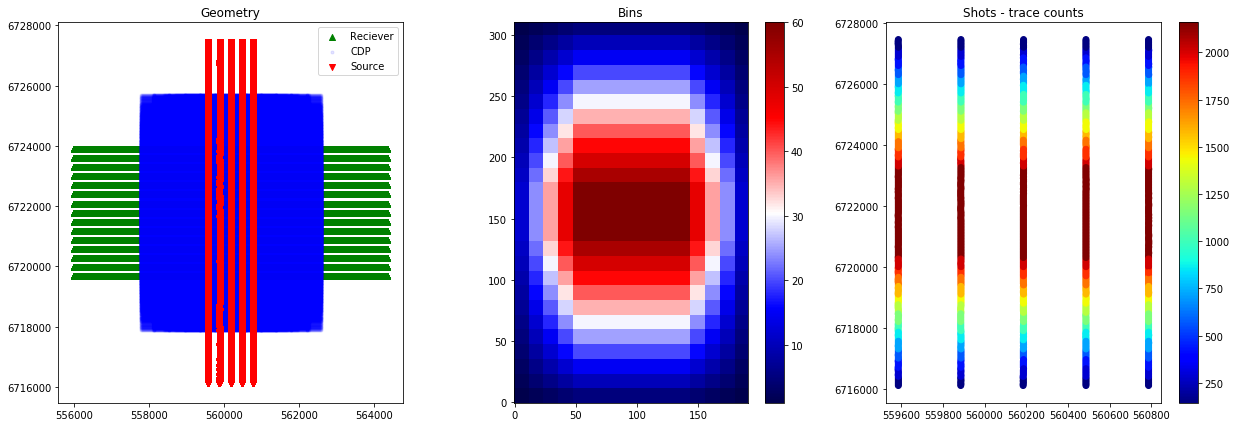

In [75]:
visualize_geom(findex)

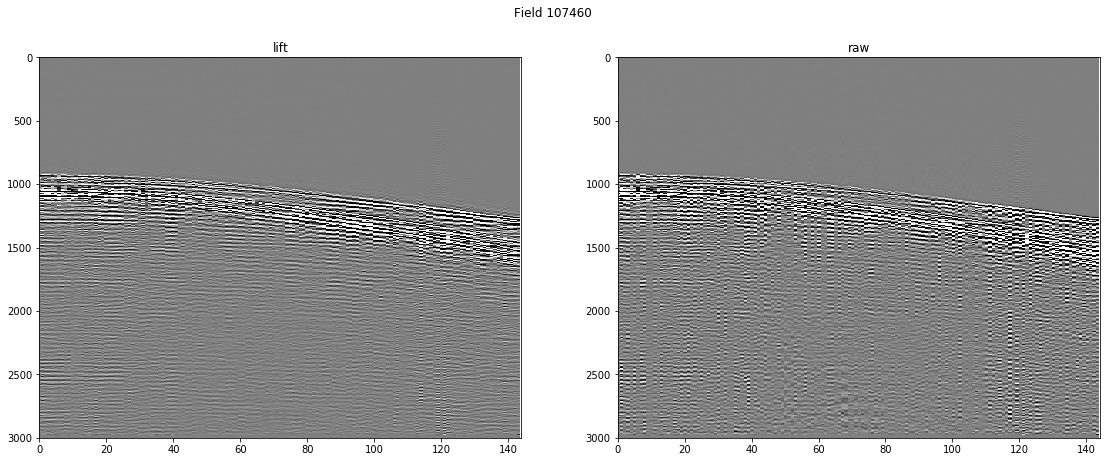

In [19]:
check_res2(0, findex, components, cv=1);

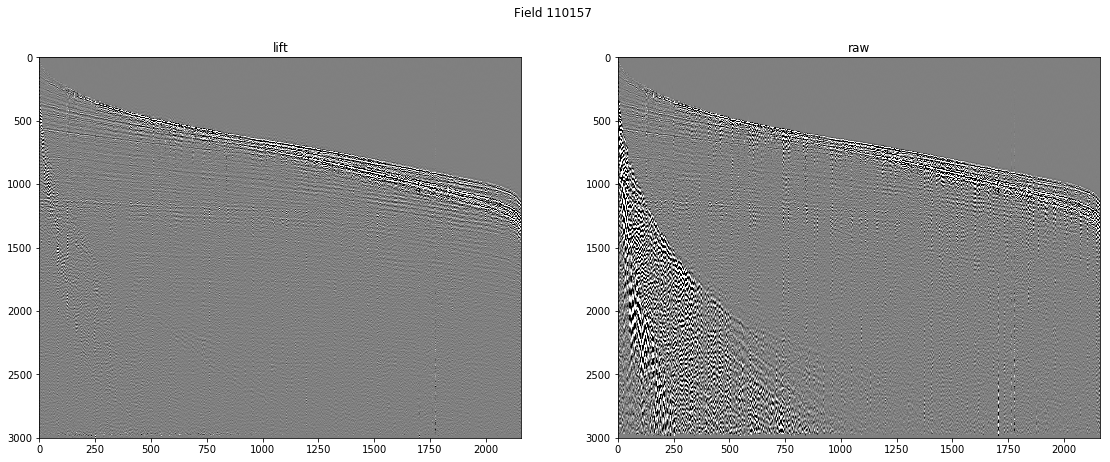

In [21]:
check_res2(500, findex, components, cv=1);

In [32]:
bindex = CustomIndex(findex, index_name='CDP')
vc = findex.get_df().CDP.value_counts()
bindex = bindex.create_subset(vc[vc >= 60].index)

len(bindex)

4608

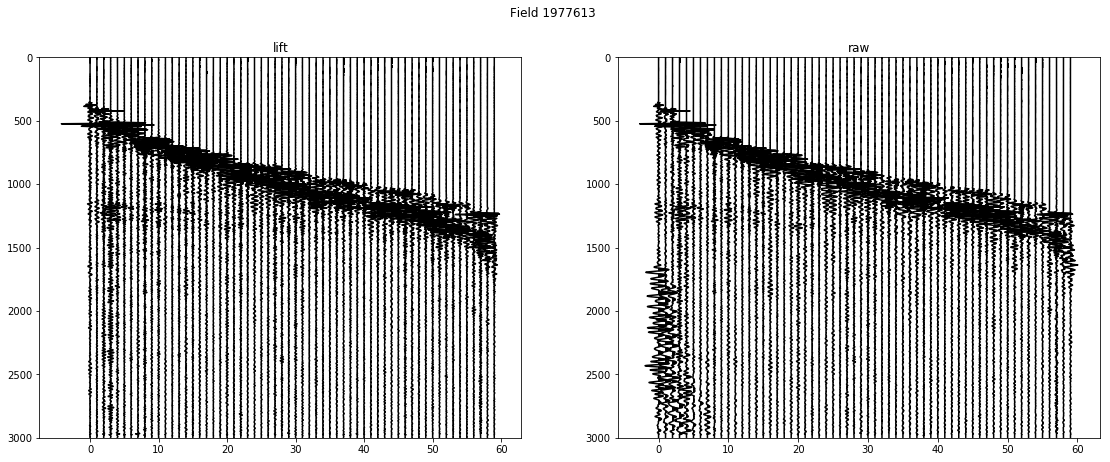

In [56]:
check_res2(0, bindex, components, index_type=CustomIndex, index_name='CDP', mode='wiggle', std=0.2);

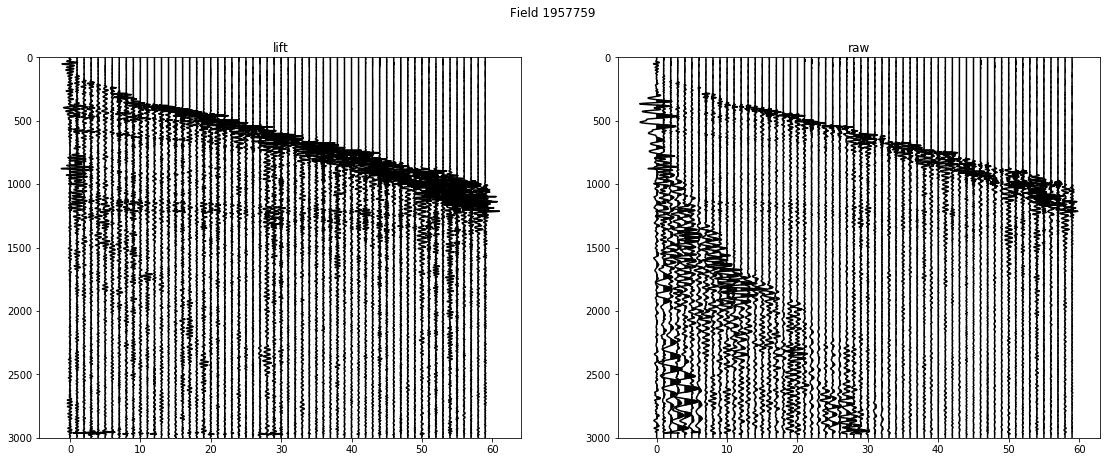

In [41]:
check_res2(239, bindex, components, index_type=CustomIndex, index_name='CDP', mode='wiggle', std=0.2);